In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def parabola(x, a, b, c, s):
    y = a*(x**2) + b*x + c
    y += s * np.random.randn(len(y))
    return y

In [4]:
def f(x,par):
    y = 0.
    for i in range(len(par)):
        y+=par[len(par)-i-1]*(x)**i
    return y

In [5]:
def least_squares(XYp,k):
    sumX = [0. for i in range(2*k)] #{x,x²,x³,..}
    sumY = [0. for i in range(k+1)] #{y,y*x,y*x²,y*x³,..}
    b = [0. for i in range(k+1)]    #{b0,b1,b2,b3,..}
    
    for i in range(len(XYp['x'])):
        x=XYp['x'][i]
        y=XYp['y'][i]
        for j in (np.arange(2*k)):
            sumX[j]+= x**(j+1)
            if j == 0:
                sumY[j]+= y
            elif j<=k:
                sumY[j]+= (y*(x**j))
                
    sumX = [len(XYp['x'])]+sumX        
    matr = np.array([0. for i in range((k+1)**2)]).reshape(k+1,k+1)
        
    l=0
    for i in range(k+1):
        for j in range(k+1):
            matr[i][j] = sumX[l]
            l+=1
        l-=k
        
    matr = np.linalg.inv(matr)        
    sumY = np.array(sumY)
    b = np.dot(matr,sumY)[::-1]
    
    XYf={'x':XYp['x'].copy(),'y':[f(x,b) for x in XYp['x']]}
    plt.plot(XYp['x'],XYp['y'],'ro')
    plt.plot(XYf['x'],XYf['y'],'b')
    
    plt.title('y = ('+str(round(b[0],4))+')x²+('+str(round(b[1],4))+')x+('+str(round(b[1],4))+')')
    msg = ''
    

In [6]:
def normal_equation(XYp,k):
    X = [[1,x] for x in XYp['x']]
    if k>1:
        for k in np.arange(k-1)+2:
            for i in X:
                i.append(i[-1]**2)
                
    X = np.array(X)
    
    b = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),XYp['y'])[::-1]
    
    XYf={'x':XYp['x'].copy(),'y':[f(x,b) for x in XYp['x']]}
    plt.plot(XYp['x'],XYp['y'],'ro')
    plt.plot(XYf['x'],XYf['y'],'b')  
    plt.title('y = ('+str(round(b[0],4))+')x²+('+str(round(b[1],4))+')x+('+str(round(b[1],4))+')')

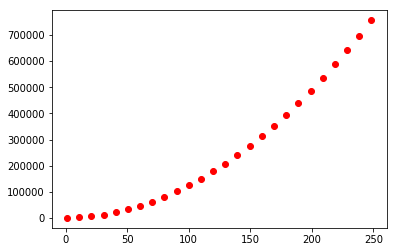

In [7]:
a=12.1223
b=31.123
c=29.123
s=3
k=2
XYp={'x':np.array(np.arange(1,250,9.9))}
XYp['y']=parabola(XYp['x'], a, b, c, s)
plt.plot(XYp['x'],XYp['y'],'ro')

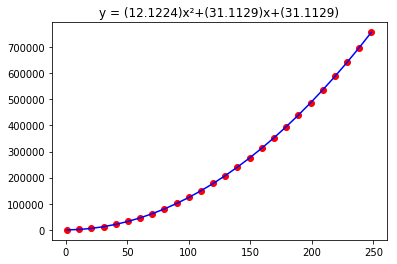

In [8]:
normal_equation(XYp,k)

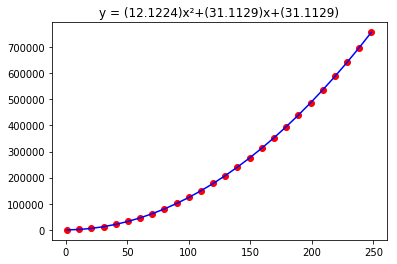

In [9]:
least_squares(XYp,k)